# Final Work - introduction to data science!
- Name: **Eduards Skukis**;
- email: edskukis@gmail.com;
- phone: +372 5885 6618

### Specialization **Data Analyst**

- start at 4 of January
- finish at 19 of January
- --


# Indrodaction


The goal of this phase is to prepare the dataset for analysis by addressing data quality issues, cleaning the data, and gaining a preliminary understanding of the key attributes and their distributions. This initial exploration will set the stage for more in-depth analysis and interpretation.


## Conduct preparatory work:
> - Read the provided dataset.
> - Familiarize yourself with the descriptions of the given attributes.
> - Assess the completeness and cleanliness of the data.
> - Understand the real-world context behind these data.
> - Format the data for further analysis.


## Exploratory Data Analysis:

### Perform basic data cleaning:
> - Address duplicates, empty values, data type issues, and unnecessary attributes.
> - Ensure data quality through cleaning procedures.

### Explore the distribution of key attributes and their relationships:
> - Examine the distribution of essential attributes.
> - Analyze relationships between different attributes.

---

# Key Metrics

## Session Information:
> - Visit ID (session_id): Unique identifier for each visit.

## Visit Information Metrics:
> - hit_date — Event date.
> - hit_time — Event time.
> - hit_number — Sequential number of the event within the session.

## Event Details:
> - hit_type — Event type.
> - hit_referer — Event source.
> - hit_page_path — Event page.

## Event Action:
> - event_category — Type of action.
> - event_action — Action.
> - event_label — Action tag.
> - event_value — Action result value.


---

In [1]:
#pip install geopandas

---

# Data Analysis:
## Import modules

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
# import geopandas as gpd

---

## Global variables

In [3]:
# all visits from ga_sessions.utm_medium
organic_traffic = ['organic', 'referral', '(none)']

# Advertising on social networks - all visits from ga_sessions.utm_source
ad_social_media = ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 
 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm')

---

## Head of functions

In [4]:
# returns a list of columns in the data whose NaN is greater than the entered value proc
def get_drop_columns(df, proc=70):
    missing_values = (df.isna().sum() / len(df) * 100).sort_values()
    columns_to_drop = [column for column, percentage in missing_values.items() if percentage > proc]

    return columns_to_drop

In [5]:
# returns the percentage of empty values in the passed dataframe
def get_emply_percentage(df):
    colums_list = df.columns.tolist()
    proc = {}
    for colum in colums_list:
        proc[colum] = df[colum].isna().sum() / len(df) * 100
    proc = sorted(proc.items(), key=lambda x: x[1], reverse=True)    
    return proc

In [6]:
# returns a list of column names whose unique values are less than proc=0.1 values
def get_rows_less(df, colum_name, proc=0.1):
    # All devices under 0.1% drop
    device_os_percentage = df[colum_name].value_counts(normalize=True) * 100
    # Identify values with less than 0.1% occurrence
    values_to_drop = device_os_percentage[device_os_percentage < proc].index
    return values_to_drop

In [7]:
# plot bar
def plot_bar(data, name):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{name} Distribution (Percentage)')
    plt.xlabel(f'{name}')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()
    

---

## Loading the ga session dataset

In [8]:
path_ga_session = 'data/ga_sessions.csv'

df_session = pd.read_csv(path_ga_session, low_memory=False)
before_size = df_session.shape
print(f'DF- Ga session size : {before_size}')

DF- Ga session size : (1860042, 18)


*It looks like I have successfully loaded this data into a DataFrame with 18 columns and 1,860,042 rows. This is a significant amount of data, and now I can begin your analysis.*

### Data Overview

In [9]:
df_session.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   session_id                1860042 non-null  object
 1   client_id                 1860042 non-null  object
 2   visit_date                1860042 non-null  object
 3   visit_time                1860042 non-null  object
 4   visit_number              1860042 non-null  int64 
 5   utm_source                1859945 non-null  object
 6   utm_medium                1860042 non-null  object
 7   utm_campaign              1640439 non-null  object
 8   utm_adcontent             1524427 non-null  object
 9   utm_keyword               777981 non-null   object
 10  device_category           1860042 non-null  object
 11  device_os                 789904 non-null   object
 12  device_brand              1492864 non-null  object
 13  device_model              16338 non-null  

In [10]:
df_session.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


*The data types seem appropriate for each column, and it isn't good to see that there are no missing values (non-null counts match the total number of entries).
I can now proceed with exploratory data analysis, visualization, and further analysis based on objectives and questions about the data.*

---

## Handling Missing Values

<Axes: >

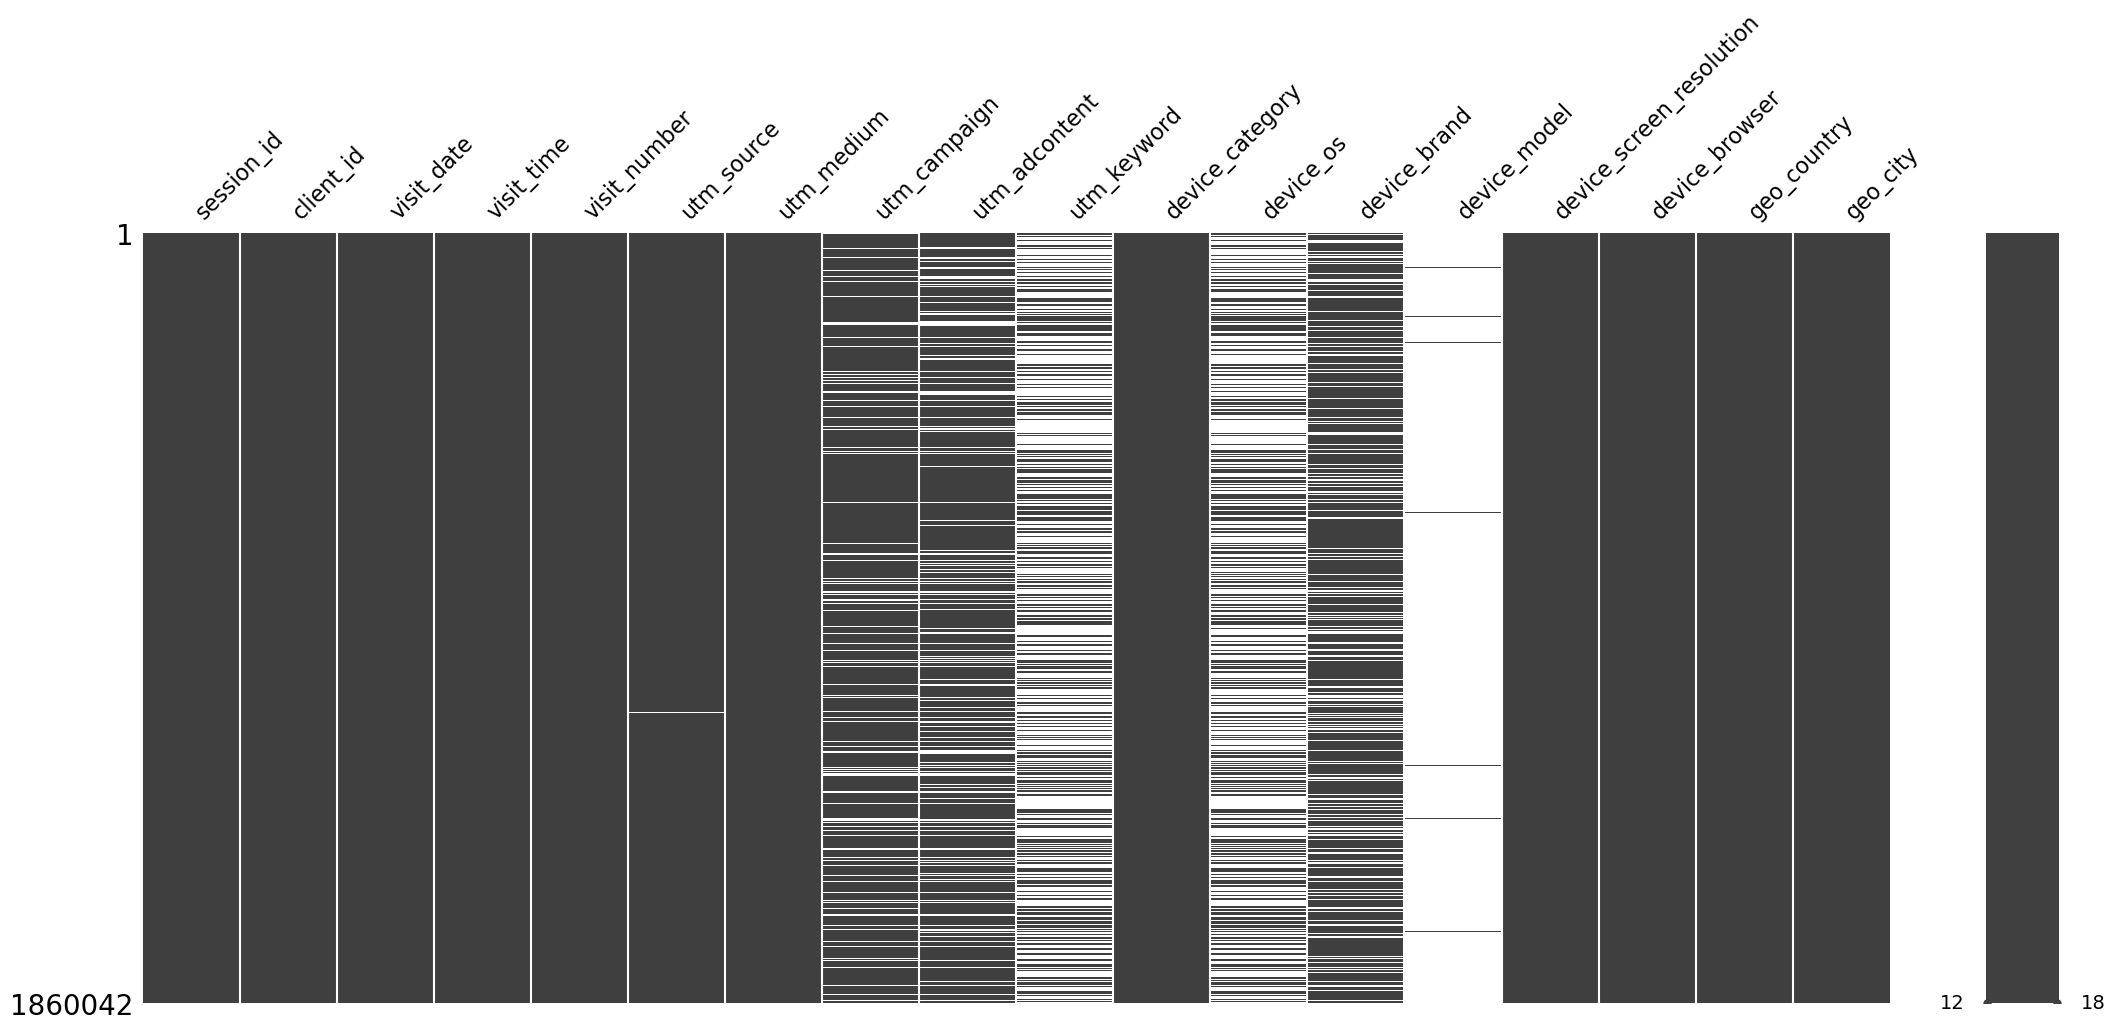

In [11]:
msno.matrix(df_session)

**Fig. 1: Graphical representation of the completeness of the dataset.**

P.S. There are many resources to display!!!

### Removing uninformative columns
Remove all columns whose occupancy is less than 70%

In [12]:
#Remove all columns that have more than 70% NaN.
drop_coloms = get_drop_columns(df_session, 70)
print(f'Columns that have more than 70% NaN.:{drop_coloms}')
df_session = df_session.drop(columns=drop_coloms)

Columns that have more than 70% NaN.:['device_model']


**device_model** apparently less than 70% of the information is filled in. It is not possible to fill it out at this stage.

---

### Checking what percentage of empty values in **utm_source**

In [13]:
proc = df_session['utm_source'].isna().sum() / len(df_session) * 100

In [14]:
print(f'if the percentage Nan < 1% then remove all empty values {proc}')
if proc < 1:
    df_session = df_session.dropna(subset=['utm_source'])

if the percentage Nan < 1% then remove all empty values 0.0052149360068213515


---

### Checking what percentage of empty values in other colum

In [15]:
get_emply_percentage(df_session)

[('utm_keyword', 58.177042869547215),
 ('device_os', 57.53600240867337),
 ('device_brand', 19.73854065577208),
 ('utm_adcontent', 18.042200172585748),
 ('utm_campaign', 11.80696203382358),
 ('session_id', 0.0),
 ('client_id', 0.0),
 ('visit_date', 0.0),
 ('visit_time', 0.0),
 ('visit_number', 0.0),
 ('utm_source', 0.0),
 ('utm_medium', 0.0),
 ('device_category', 0.0),
 ('device_screen_resolution', 0.0),
 ('device_browser', 0.0),
 ('geo_country', 0.0),
 ('geo_city', 0.0)]

---

## Data type

In [16]:
# Convert 'visit_date' to datetime format and format it as 'YYYY-MM-DD'
df_session['visit_date'] = pd.to_datetime(df_session['visit_date'])
# Convert 'visit_time' to time format and format it as 'HH:MM:SS'
df_session['visit_time'] = pd.to_datetime(df_session['visit_time'], format='%H:%M:%S')

----

## Filling empty spaces with logical values

### 'utm_campaign'

11.8% values are NaN

In [17]:
df_session[df_session.utm_campaign.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
14,9055469620715506713.1636559415.1636559415,2108390820.1628883993,2021-11-10,1900-01-01 18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg
27,9055504865227535872.1639282176.1639282176,2108399026.1639282176,2021-12-12,1900-01-01 07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow
38,905553874150070422.1639028922.1639028922,210840691.1639028886,2021-12-09,1900-01-01 08:48:42,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow


In [18]:
df_session.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    463437
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
                         ...  
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 412, dtype: int64

### 'utm_adcontent'
18% values are NaN

In [19]:
df_session[df_session.utm_adcontent.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
14,9055469620715506713.1636559415.1636559415,2108390820.1628883993,2021-11-10,1900-01-01 18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg
27,9055504865227535872.1639282176.1639282176,2108399026.1639282176,2021-12-12,1900-01-01 07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow
37,905553874150070422.1639028885.1639028885,210840691.1639028886,2021-12-09,1900-01-01 08:48:05,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow
38,905553874150070422.1639028922.1639028922,210840691.1639028886,2021-12-09,1900-01-01 08:48:42,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow


In [20]:
df_session.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006542
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
                         ...   
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
WbXQsVOKLOcJrHikuQTZ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 286, dtype: int64

### 'utm_keyword'
58% values are NaN

In [21]:
df_session[df_session.utm_keyword.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,1900-01-01 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,1900-01-01 19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,1900-01-01 16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow


In [22]:
df_session.utm_keyword.value_counts()

utm_keyword
puhZPIYqKXeFPaUviSjo    506762
aXQzDWsJuGXeBXexNHjc     24241
pHqgLcdBQPSLcrTpLkdr     13767
ITfrGJNwVsHBGJMAKoct     13353
hAmNSZmQkKQKAjZEGlgb     11297
                         ...  
XsuVVTgiDIxZtndPjvDm         1
WhaUakldaAmpLumfaADO         1
nJVPLgfxsBtPAXttNVDI         1
nwKBdMZKktIQFvhZwbFe         1
fcXWTQaKfxbkBkBnzLhK         1
Name: count, Length: 1219, dtype: int64

---

I have considered different options for handling missing values. Each approach has its own implications, and the choice depends on the specific characteristics of data and the goals of this analysis. Here's a brief overview of each option:

**1. Remove Voids:**
> - **Pros:** Quick and straightforward.
> - **Cons:** Loss of 11-60% of data, potential loss of valuable information. May introduce bias if the missing data is not random.

**2. Logical Imputation::**
> - **Pros:** Could be more accurate if there's a logical way to impute missing values based on other data.
> - **Cons:** Requires a deeper understanding of the data. Not feasible if a complete picture is not available.

**3. Replace with Mode or New Value:**
> - **Pros:** Simple and quick. Preserves the structure of the data.
> - **Cons:** May introduce bias if the most frequent value (mode) is not representative. Creating a new value requires careful consideration of its impact on analysis.

In [23]:
#I haven’t found a logical way to replace the data for utm values. Therefore, I will replace it with other.
list_to_repeat = ['utm_campaign', 'utm_adcontent', 'utm_keyword']
for column in list_to_repeat:
    df_session[column].fillna(value='other', inplace=True)

In [24]:
get_emply_percentage(df_session)

[('device_os', 57.53600240867337),
 ('device_brand', 19.73854065577208),
 ('session_id', 0.0),
 ('client_id', 0.0),
 ('visit_date', 0.0),
 ('visit_time', 0.0),
 ('visit_number', 0.0),
 ('utm_source', 0.0),
 ('utm_medium', 0.0),
 ('utm_campaign', 0.0),
 ('utm_adcontent', 0.0),
 ('utm_keyword', 0.0),
 ('device_category', 0.0),
 ('device_screen_resolution', 0.0),
 ('device_browser', 0.0),
 ('geo_country', 0.0),
 ('geo_city', 0.0)]

---

### 'device_os'
57.5% values are NaN

*https://gs.statcounter.com/os-market-share#monthly-202106-202206*

The most popular device_os in the world
> 1. Android - 44,17%
> 2. Windows - 28,96%
> . iOS - 17,46%
> 4. MacOS - 5,56%
> 5. Неизвестные - 1,92%
> 6. Linux - 0,92%

In [25]:
df_session[df_session.device_os.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,other,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,other,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,1900-01-01 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,1900-01-01 19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,1900-01-01 16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow


In [26]:
df_session.device_os.value_counts()

device_os
Android          464019
iOS              207094
Windows           88298
Macintosh         24781
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

---

#### iOS

With a high degree of probability, we can state that if the device_brand is Apple and the device_browser is Safari, then it is iOS. Let's proceed with the replacement.

In [27]:
# device OS - iOS
conditions = (df_session['device_os'].isna()) & (df_session['device_brand'] == 'Apple')
df_session.loc[conditions, 'device_os'] = 'iOS'

conditions = (df_session['device_os'].isna()) & (df_session['device_browser'] == 'Safari')
df_session.loc[conditions, 'device_os'] = 'iOS'

---

#### Android - 01

With a high degree of certainty, we can assume that all phones have the Android operating system if it's not explicitly mentioned in our list of device operating systems. Therefore, let's identify this list and substitute it with Android values.

In [28]:
# All phone brand
list_phone_brand = df_session.device_brand[(df_session['device_category'] == 'mobile')].unique().tolist()
# Define the list of known device OS values
known_device_os_list = df_session['device_os'].unique().tolist()

# Remove brand if this is in devise_os
for list in known_device_os_list:
    try:
        list_phone_brand.remove(list)
    except:
        None

In [29]:
# device OS - Android

conditions = (df_session['device_os'].isna()) & (df_session['device_category'].isin(['mobile', 'tablet'])) & (df_session['device_brand'].isin(list_phone_brand))
df_session.loc[conditions, 'device_os'] = 'Android'

Сheck the outcome after the replacement:

In [30]:
df_session[df_session.device_os.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,1900-01-01 19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,1900-01-01 16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow
10,9055466554104774132.1629442326.1629442326,2108390106.1624800756,2021-08-20,1900-01-01 09:00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13,1900-01-01 22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01,1900-01-01 20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg


In [31]:
df_session.device_os.value_counts()

device_os
Android          763354
iOS              578535
Windows           88298
Macintosh         24781
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

---

#### Android - 02

It is highly likely that all devices_branded as Samsung have the device_os Android. Therefore, let's replace it with Android values.

In [32]:
# device OS - Android
conditions = (df_session['device_os'].isna()) & (df_session['device_category'].isin(['mobile', 'tablet'])) & (df_session['device_brand'] == 'Samsung')
df_session.loc[conditions, 'device_os'] = 'Android'

Сheck the outcome after the replacement:

In [33]:
df_session[df_session.device_os.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
63,9055657327967035032.1629707931.1629707931,2108434524.1629707928,2021-08-23,1900-01-01 11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,other,desktop,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow
64,905565977351442956.1622561294.1622561294,210843509.1622561292,2021-06-01,1900-01-01 18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,desktop,NaN,NaN,1920x1080,Chrome,Russia,Moscow
73,9055788191321875859.1626006934.1626006934,2108464993.1626006931,2021-07-11,1900-01-01 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,desktop,NaN,NaN,1280x720,Chrome,Russia,Moscow
74,9055788191321875859.1627377569.1627377569,2108464993.1626006931,2021-07-27,1900-01-01 12:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,nSReTmyFtbSjlPrTKoaX,JNHcPlZPxEMWDnRiyoBf,other,desktop,NaN,NaN,1920x1080,Chrome,Russia,Moscow
80,9055795780529779605.1626698645.1626698645,2108466760.1626698645,2021-07-19,1900-01-01 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,desktop,NaN,NaN,1920x1080,Chrome,Russia,Yoshkar-Ola


In [34]:
df_session.device_os.value_counts()

device_os
Android          929859
iOS              578535
Windows           88298
Macintosh         24781
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

---

#### Other desctop


It is impossible to determine the operating system for desktop devices without additional information. Therefore, let's replace it with "other_desktop".

In [35]:
# device OS - desktop_other
conditions = (df_session['device_os'].isna()) & (df_session['device_category'] == 'desktop')
df_session.loc[conditions, 'device_os'] = 'other_desktop'

Сheck the outcome after the replacement:

In [36]:
df_session[df_session.device_os.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
83,9055834796008808950.1622811129.1622811129,2108475844.1622811126,2021-06-04,1900-01-01 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,(not set),360x640,Chrome,Russia,Chelyabinsk
127,9056013556852379550.1632554912.1632554912,2108517465.1632554910,2021-09-25,1900-01-01 10:00:00,1,RmEBuqrriAfAVsLQQmhk,cpc,VBmazutCflYumtDHrQYe,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,(not set),342x741,Firefox,Russia,Kazan
222,9056468728897608385.1633688258.1633688258,2108623443.1633688257,2021-10-08,1900-01-01 13:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,(not set),360x820,Chrome,Russia,Rostov-on-Don
223,9056468728897608385.1633787577.1633787577,2108623443.1633688257,2021-10-09,1900-01-01 16:00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,other,mobile,NaN,(not set),360x820,Chrome,Russia,Krasnodar
434,9057369971947378942.1630968063.1630968063,2108833280.1630968062,2021-09-07,1900-01-01 01:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,mobile,NaN,(not set),384x858,Chrome,Russia,Moscow


In [37]:
df_session.device_os.value_counts()

device_os
Android          929859
iOS              578535
other_desktop    220862
Windows           88298
Macintosh         24781
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

The devices with the "other_desktop" indicator have a count of 248,223, which is a relatively high value. It might be worth improving the system for detecting the operating system in the data collection process.

---

#### Other mobile

It is impossible to determine the operating system for mobile and tablet devices without additional information. Therefore, let's replace it with "other_mobile".

In [38]:
# device OS - mobile_other
conditions = (df_session['device_os'].isna()) & (df_session['device_category'].isin(['mobile', 'tablet']))
df_session.loc[conditions, 'device_os'] = 'other_mobile'

Сheck the outcome after the replacement:

In [39]:
df_session[df_session.device_os.isnull()].head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city


In [40]:
df_session.device_os.value_counts()

device_os
Android          929859
iOS              578535
other_desktop    220862
Windows           88298
Macintosh         24781
other_mobile      11995
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

---

 I have addressed the issue with missing values. Now, let's examine the unique values.

In [41]:
df_session['device_os'].value_counts(normalize=True) * 100

device_os
Android          49.993898
iOS              31.104952
other_desktop    11.874652
Windows           4.747345
Macintosh         1.332351
other_mobile      0.644912
Linux             0.275277
(not set)         0.019570
Chrome OS         0.004462
BlackBerry        0.001452
Tizen             0.000376
Samsung           0.000215
Windows Phone     0.000215
Firefox OS        0.000161
Nokia             0.000161
Name: proportion, dtype: float64


Let's keep all values for now, but there are ideas to delete all exotic operating systems.

In [42]:
# # All devices under 0.1% drop
# values_to_drop = get_rows_less(df_session, colum_name='device_os', proc=0.1)
# df_session = df_session[~df_session['device_os'].isin(values_to_drop)]

In [43]:
# df_session['device_os'].value_counts(normalize=True) * 100

In [44]:
get_emply_percentage(df_session)

[('device_brand', 19.73854065577208),
 ('session_id', 0.0),
 ('client_id', 0.0),
 ('visit_date', 0.0),
 ('visit_time', 0.0),
 ('visit_number', 0.0),
 ('utm_source', 0.0),
 ('utm_medium', 0.0),
 ('utm_campaign', 0.0),
 ('utm_adcontent', 0.0),
 ('utm_keyword', 0.0),
 ('device_category', 0.0),
 ('device_os', 0.0),
 ('device_screen_resolution', 0.0),
 ('device_browser', 0.0),
 ('geo_country', 0.0),
 ('geo_city', 0.0)]

----

### device_brand
19.7% values are NaN

In [45]:
df_session.device_brand.value_counts(normalize=True) * 100

device_brand
Apple       36.915259
Samsung     22.252329
Xiaomi      19.316340
Huawei      12.448663
Realme       1.276578
              ...    
Vodafone     0.000067
Wexler       0.000067
KingSing     0.000067
Star         0.000067
Opera        0.000067
Name: proportion, Length: 205, dtype: float64

I have addressed the issue with missing values. Now, let's examine the unique values, remove all values less than 0.01%

In [46]:
values_to_drop = get_rows_less(df_session, colum_name='device_brand', proc=0.01)
df_session = df_session[~df_session['device_brand'].isin(values_to_drop)]

In [47]:
df_session.device_brand.value_counts(normalize=True) * 100

device_brand
Apple         36.969990
Samsung       22.285321
Xiaomi        19.344979
Huawei        12.467119
Realme         1.278471
(not set)      1.177036
OPPO           0.905938
Vivo           0.787598
OnePlus        0.668452
Asus           0.531930
Nokia          0.488726
Sony           0.433313
ZTE            0.427007
Google         0.345496
Meizu          0.251575
Lenovo         0.211189
Blackview      0.185092
Tecno          0.178048
LG             0.164161
Motorola       0.158123
BQ             0.105527
itel           0.072588
Alcatel        0.064940
DOOGEE         0.058768
Oukitel        0.055414
HTC            0.052998
Umidigi        0.044344
Ulefone        0.034281
Infinix        0.027975
Vsmart         0.024688
LeEco          0.023078
BlackBerry     0.022675
Cubot          0.021468
Philips        0.020059
Mozilla        0.019791
POCO           0.015363
Sharp          0.015162
Vertex         0.013283
TP-Link        0.013015
DEXP           0.012746
Prestigio      0.011472
Lea

In [48]:
df_session.device_brand.isna().sum()

367126

In [49]:
# will replace it with other.
df_session['device_brand'].fillna(value='other', inplace=True)

---

### device_browser

In [50]:
df_session.device_browser.value_counts(normalize=True) * 100

device_browser
Chrome                              54.453353
Safari                              25.759917
YaBrowser                            7.162432
Safari (in-app)                      3.763292
Android Webview                      2.973137
Samsung Internet                     2.546596
Opera                                1.441110
Firefox                              0.892915
Edge                                 0.864709
UC Browser                           0.046508
Android Runtime                      0.021101
Mozilla Compatible Agent             0.019486
[FBAN                                0.014480
Instagram 208.0.0.32.135 Android     0.007536
Instagram 209.0.0.21.119 Android     0.005975
MRCHROME                             0.004145
Android Browser                      0.002584
Puffin                               0.002368
Opera Mini                           0.001992
Internet Explorer                    0.001938
Maxthon                              0.001669
Android            

In [51]:
# values_to_drop = get_rows_less(df_session, colum_name='device_browser', proc=0.1)
# df_session = df_session[~df_session['device_browser'].isin(values_to_drop)]

---

### geo_country

In [52]:
df_session.geo_country.value_counts(normalize=True) * 100

geo_country
Russia                 96.802073
United States           0.633621
Ukraine                 0.484461
Ireland                 0.216769
Belarus                 0.195615
                         ...    
Zambia                  0.000054
Malawi                  0.000054
Réunion                 0.000054
Barbados                0.000054
Congo - Brazzaville     0.000054
Name: proportion, Length: 166, dtype: float64

In [53]:
# values_to_drop = get_rows_less(df_session, colum_name='geo_country', proc=0.1)
# df_session = df_session[~df_session['geo_country'].isin(values_to_drop)]

----

### geo_city

In [54]:
df_session.geo_city.value_counts(normalize=True) * 100

geo_city
Moscow              43.309083
Saint Petersburg    15.954375
(not set)            4.203183
Yekaterinburg        1.924117
Krasnodar            1.732540
                      ...    
Lexington            0.000054
Bad Breisig          0.000054
Novovolynsk          0.000054
Monterrey            0.000054
Popasna              0.000054
Name: proportion, Length: 2539, dtype: float64

remove all values less than 0.01%

In [55]:
values_to_drop = get_rows_less(df_session, colum_name='geo_city', proc=0.01)
df_session = df_session[~df_session['geo_city'].isin(values_to_drop)]

In [56]:
df_session.geo_city.value_counts(normalize=True) * 100

geo_city
Moscow              44.009137
Saint Petersburg    16.212263
(not set)            4.271124
Yekaterinburg        1.955219
Krasnodar            1.760545
                      ...    
Engels               0.010612
Khanty-Mansiysk      0.010502
Mogilev              0.010338
Zheleznogorsk        0.010338
Vilnius              0.010174
Name: proportion, Length: 266, dtype: float64

---

## Visualization
Using visualizations (e.g., histograms, bar charts) to explore the distribution of key metrics and relationships between variables.

### visit_date

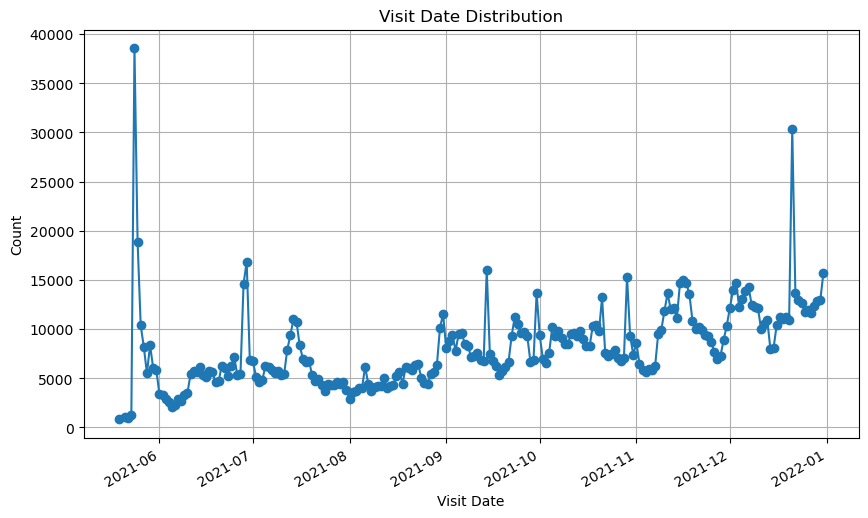

In [57]:
# Count the occurrences of each visit date
visit_date_counts = df_session['visit_date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
visit_date_counts.plot(kind='line', marker='o')
plt.title('Visit Date Distribution')
plt.xlabel('Visit Date')
plt.ylabel('Count')

# Add vertical lines for each quarter
#for quarter in pd.date_range(start=df_session['visit_date'].min(), end=df_session['visit_date'].max()):
 #   plt.axvline(x=quarter, color='gray', linestyle='--', linewidth=0.8)


plt.grid(True)
plt.show()

**Fig 2:** Number of visits depending on time.

#### Conclusion:

Based on the provided information, it's evident that certain dates stand out with a significantly higher number of visits.
Further analysis and investigation into the context surrounding those dates will help uncover the factors contributing to the increased traffic.

In [58]:
# Show visit_date more than 15,000 visits per day
count_visit = 15000
visit_date_counts[visit_date_counts >= count_visit]

visit_date
2021-05-24    38585
2021-05-25    18904
2021-06-29    16834
2021-09-14    16033
2021-10-29    15346
2021-12-21    30349
2021-12-31    15742
Name: count, dtype: int64

---

### visit_time

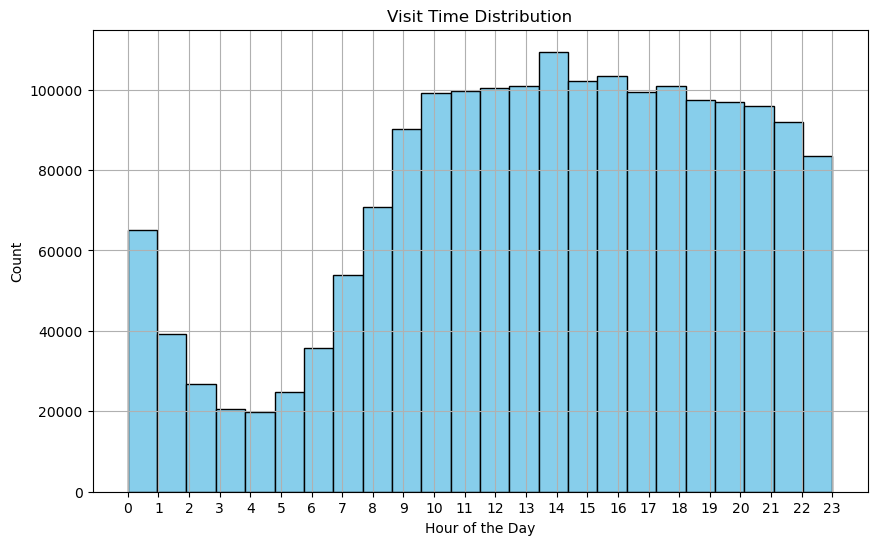

In [59]:
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df_session['visit_time'].dt.hour, bins=24, color='skyblue', edgecolor='black')
plt.title('Visit Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Fig.3:** Number of sessions depending on time of day.

#### Conclusion:

The overall picture corresponds to reality: the maximum number of visits during the daytime and the minimum at night. This also correlates with data on which regions have the maximum number of visits.

This analysis can provide a comprehensive understanding of user behavior patterns throughout the day and how they relate to geographic regions.

---

### visit_number


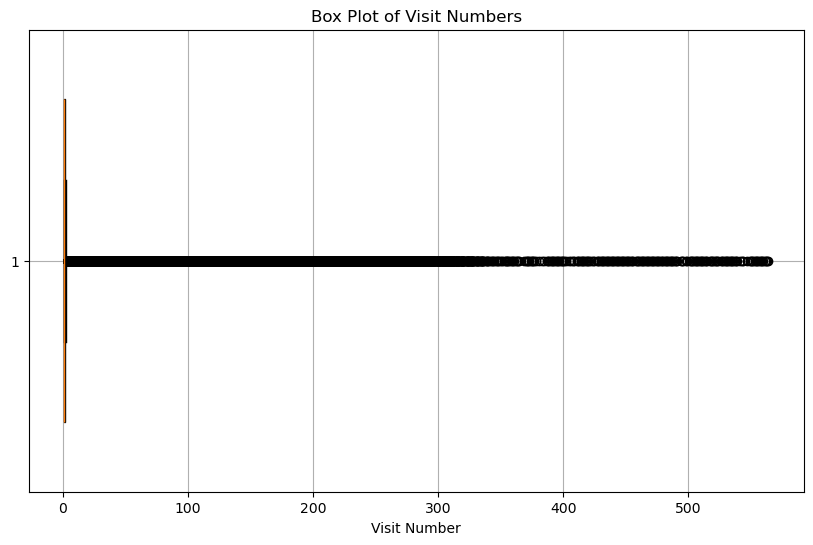

In [60]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_session['visit_number'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Visit Numbers')
plt.xlabel('Visit Number')
plt.grid(True)
plt.show()

**Fig.4:** Box plot of visit numbers.

is out lier 164853
is in lier 1663331


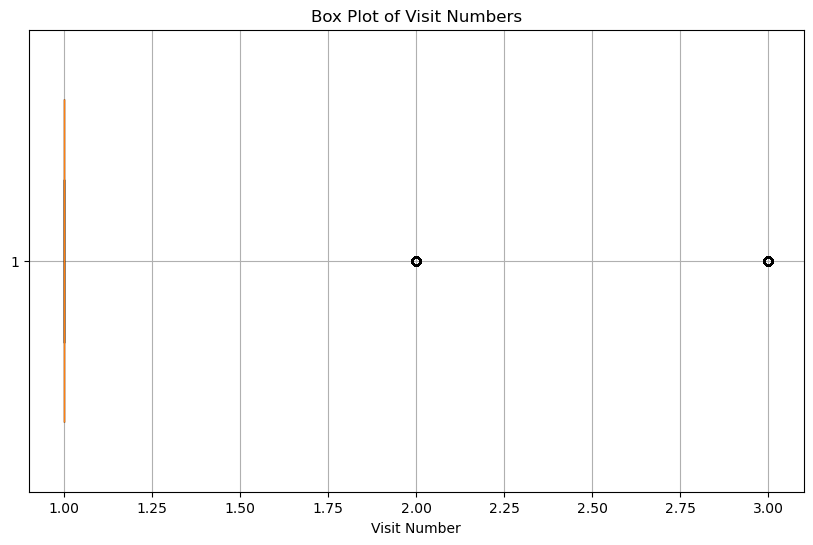

In [61]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries
    
boundaries = calculate_outliers(df_session.visit_number)

is_outlier = (df_session['visit_number']  < boundaries[0]) | (df_session['visit_number'] > boundaries[1])
print(f'is out lier {is_outlier.sum()}')

is_inlier = ~is_outlier
print(f'is in lier {is_inlier.sum()}')
             
plt.figure(figsize=(10, 6))
plt.boxplot(df_session[is_inlier].visit_number, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Visit Numbers')
plt.xlabel('Visit Number')
plt.grid(True)
plt.show()

**Fig.5:** Box plot of visit numbers after removing boundary conditions.

#### Coclusion:

Main quantity per session 1

In [62]:
df_session.visit_number.value_counts(normalize=True) * 100

visit_number
1      73.938400
2      12.681765
3       4.362526
4       2.244468
5       1.308019
         ...    
419     0.000055
420     0.000055
421     0.000055
422     0.000055
564     0.000055
Name: proportion, Length: 537, dtype: float64

---

### device category

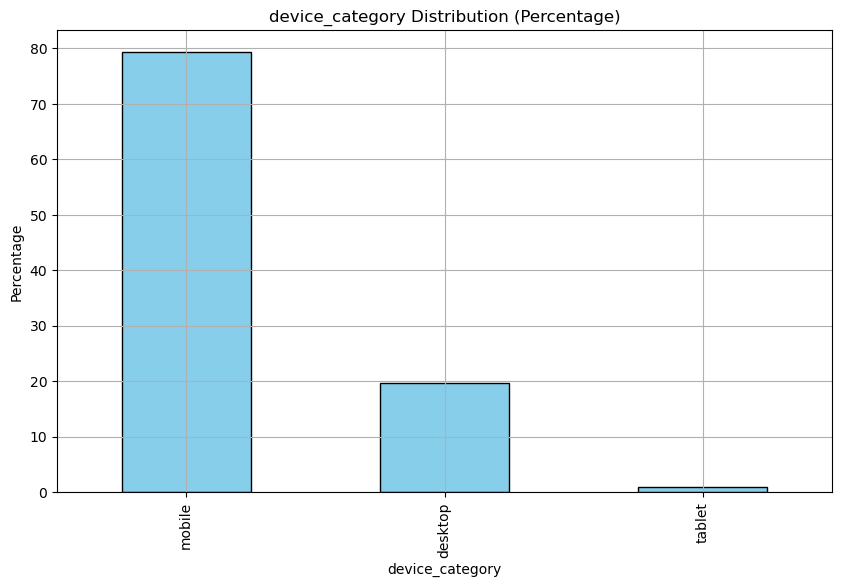

In [63]:
name = 'device_category'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.6:** Percentage of the session device category - ver.1.

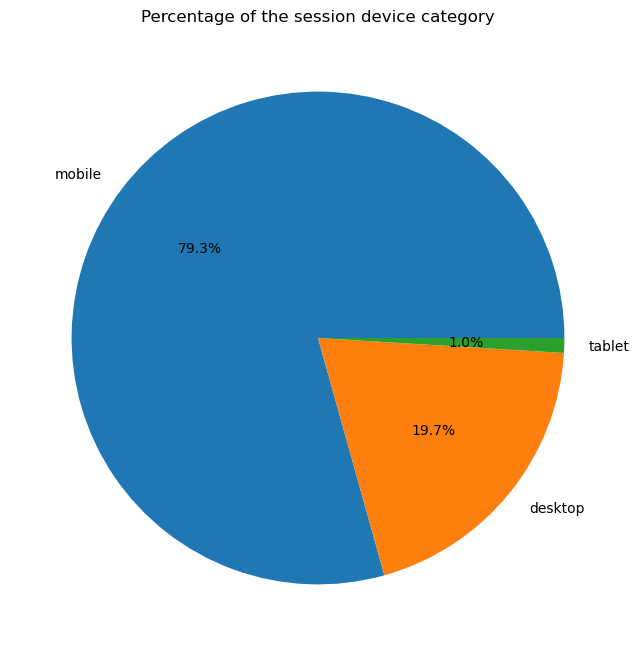

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))
lebels = data.index
ax.pie(data, labels=lebels, autopct='%1.1f%%')
plt.title('Percentage of the session device category')
plt.show()

**Fig.7:** Percentage of the session device category - ver.2.

#### Conclusion:


The result is predictable: 79% of users prefer using the mobile application, while 19% prefer the desktop version. These findings indicate which devices should be prioritized for software improvement. In case of specific goals, this also provides insight into which devices are worth enhancing.

----

### device_brand

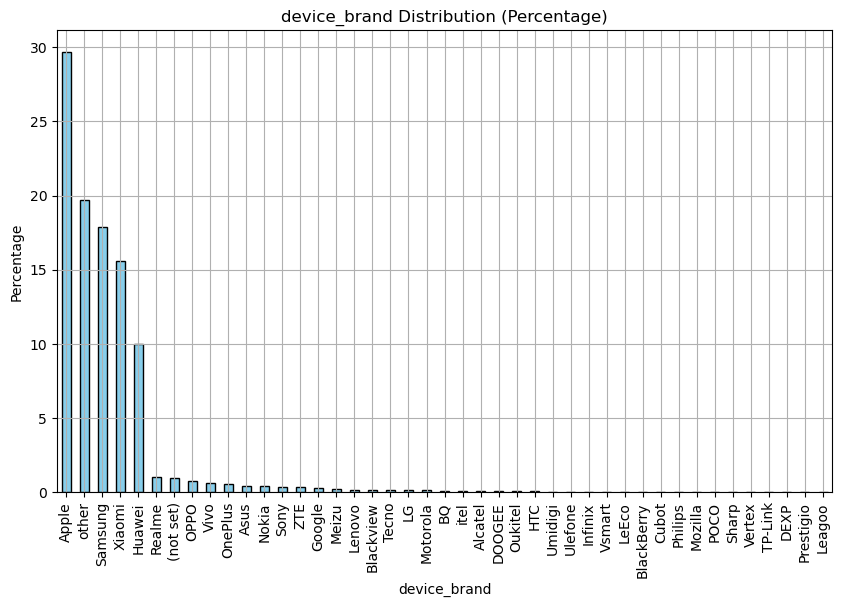

In [65]:
name = 'device_brand'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.8:** Percentage distribution of used devices used by site visitors.

#### Conclusion:


The top five is as expected, consisting of Apple, Samsung, Xiaomi, and Huawei. It's essential to seek clarification and investigate further. It's advisable to consult with the department responsible for setting up Google Analytics to understand why there are a significant number of omissions in the data.

Checking with the relevant team will provide insights into potential issues or discrepancies in the data collection process. Addressing and resolving these omissions is crucial for obtaining accurate and reliable information for analysis.

In conclusion, the identified top device manufacturers align with expectations. However, the presence of omissions emphasizes the importance of a thorough investigation to ensure data integrity and reliability. Engaging with the Google Analytics setup team is a necessary step to identify and rectify any issues affecting the completeness of the data.

---

### device_os

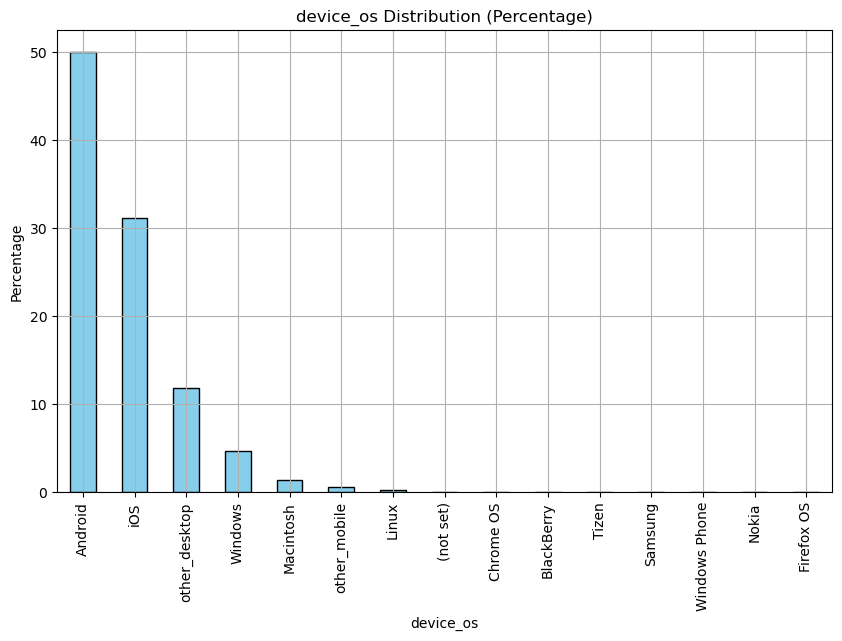

In [66]:
name = 'device_os'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.9:** Percentage distribution of used devices OS used by site visitors.

#### Conclusion:

The obtained picture corresponds to the previously mentioned research results regarding the usage of various operating systems and the percentage distribution. It is important to clarify, similar to the previous case, the reasons behind the significant values that have been replaced with "other_desktop" and "other_mobile."

---

### device_browser

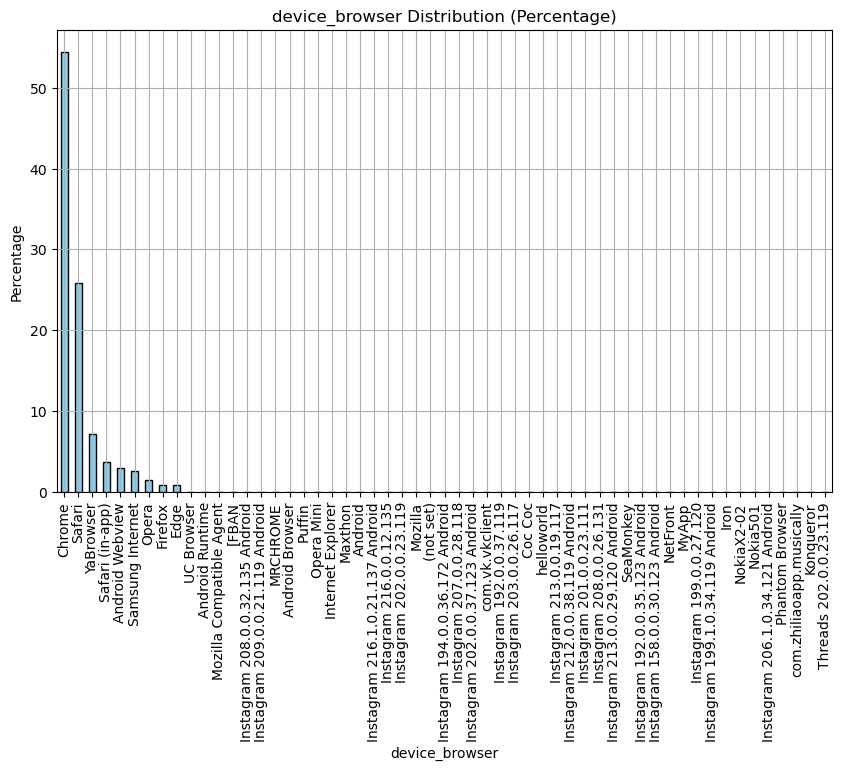

In [67]:
name = 'device_browser'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.10:** Percentage distribution of used devices browser used by site visitors.

#### Conclusion:

The data for the device browsers follows a logical distribution in descending order of usage. These findings also correlate with the previously examined data. Chrome, Safari, and YaBrowser are leading in terms of usage.

---

### geo_country

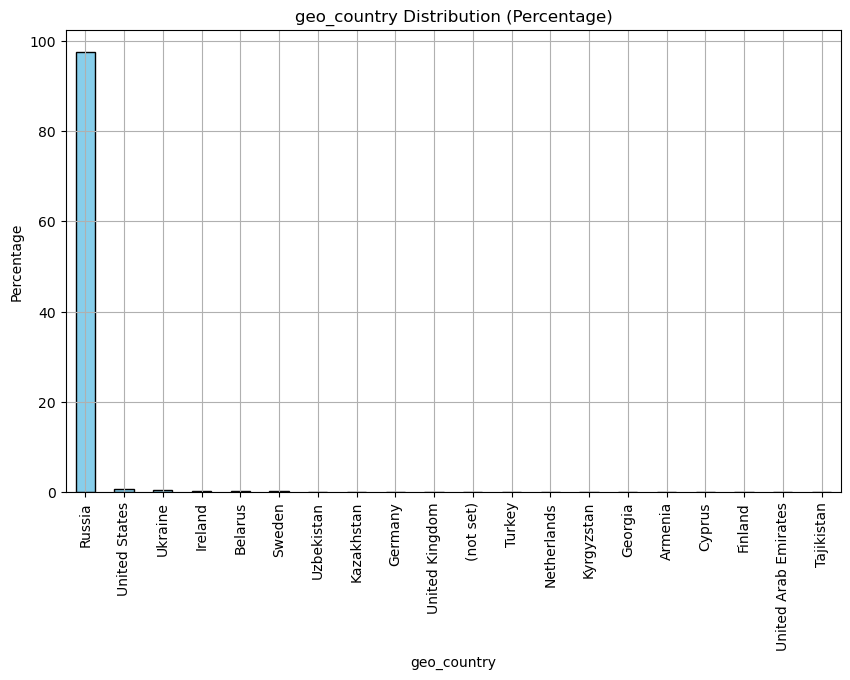

In [68]:
name = 'geo_country'
data = df_session[name].value_counts(normalize=True) * 100
data = data.head(20)
# Plotting
plot_bar(data, name)

**Fig.11:** Percentage distribution of top 20 countries by site visitors.

#### Conclusion:

The main traffic of users is coming from Russia, which can be explained by the provision of services tailored for the Russian market.

----

### geo_city

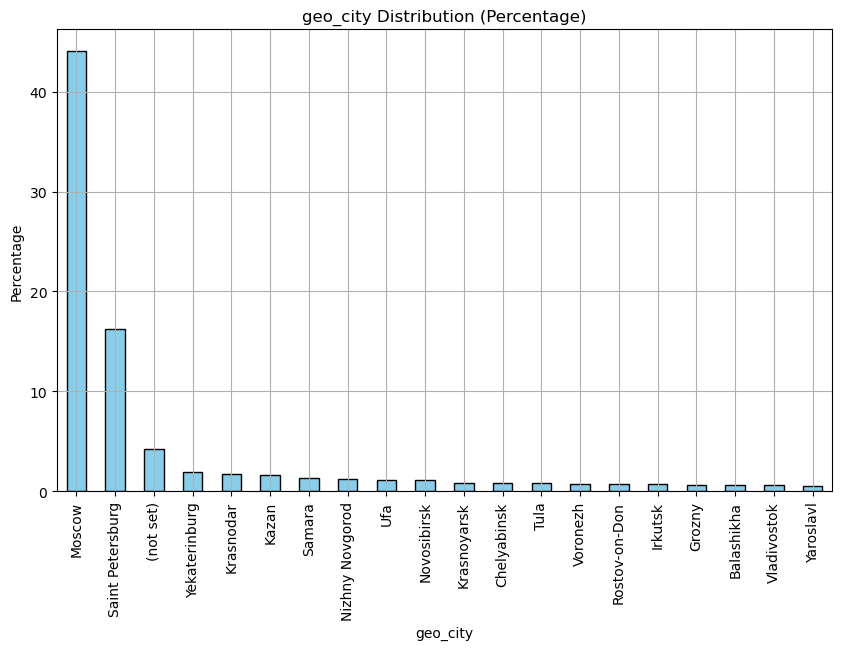

In [69]:
name = 'geo_city'
data = df_session[name].value_counts(normalize=True) * 100
data = data.head(20)
# Plotting
plot_bar(data, name)

**Fig.12:** Percentage distribution of top 20 cities by site visitors.

#### Conclusion:

The information shows in which cities potential clients reside. With this data, targeted advertising efforts can be increased to promote business development in specific cities. It's natural that Moscow and Saint Petersburg, being the two most economically developed cities, lead in this regard.

---

# Create new columns

For the sake of convenience, we will create new columns with binary values to be used for machine learning purposes. These columns will help categorize the data based on specific criteria. In the future, these columns will serve as features for machine learning models, with values set as 1 or 0.

## Organic Traffic:

>- Column Name: **utm_source_new**
>- Criteria: All visits from ga_sessions.utm_medium matching specified values.
>- Values: **1** if the visit is from organic traffic, **0** if from paid traffic.
>- Organic Traffic Mediums: *['organic', 'referral', '(none)']*

In [70]:
df_session.loc[:, 'utm_source_new'] = df_session['utm_source'].apply(lambda x: 1 if x in ad_social_media else 0)

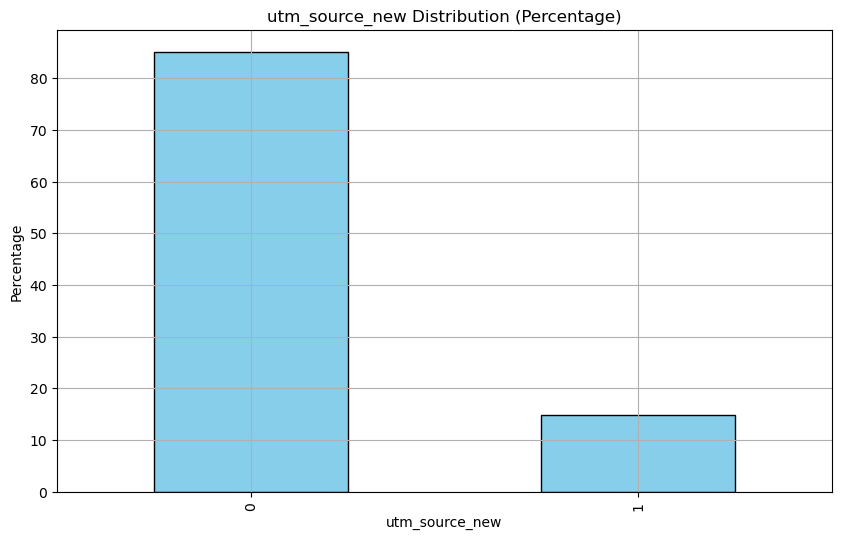

In [71]:
name = 'utm_source_new'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.13:** Organic paid distribution ver.-1.

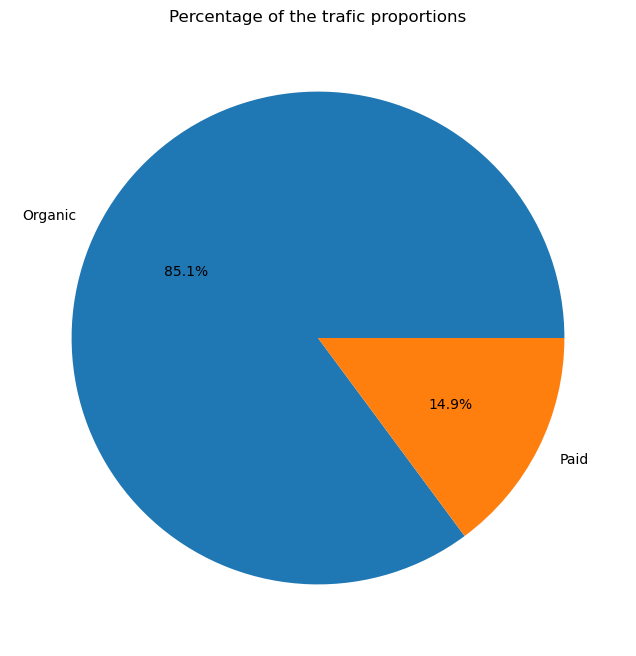

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
lebels = ['Organic', 'Paid']
ax.pie(data, labels=lebels, autopct='%1.1f%%')
plt.title('Percentage of the trafic proportions')
plt.show()

**Fig.14:** Organic paid distribution ver.-2.

#### Conclusion:

>- The majority of the traffic, around 85.14%, is categorized as organic, representing visits from sources such as search engines, referrals, or direct visits.
>- Approximately 14.86% of the traffic is classified as paid, indicating visits from sources that involve advertising or promotional campaigns.

The dominance of organic traffic suggests that a significant portion of users is reaching the website through non-paid channels. This could include users discovering the website through search engine results, referrals from other websites, or direct visits. Understanding the proportion of organic versus paid traffic is essential for optimizing marketing strategies, allocating resources effectively, and gaining insights into user acquisition channels.

Moving forward, this information can be valuable for refining advertising efforts, focusing on successful organic channels, and potentially exploring opportunities to enhance paid traffic sources. Additionally, monitoring changes in these proportions over time can provide insights into the effectiveness of marketing campaigns and overall user engagement strategies.

---

## Advertising on Social Networks:

>- Column Name: **utm_medium_new**
>- Criteria: All visits from ga_sessions.utm_medium matching specified values.
>- Values: **1**  if the visit is from advertising on social networks, **0** if from other sources.
>- Social Media Sources: **('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm')**

In [73]:
df_session.loc[:,'utm_medium_new'] = df_session['utm_medium'].apply(lambda x: 1 if x in organic_traffic else 0)

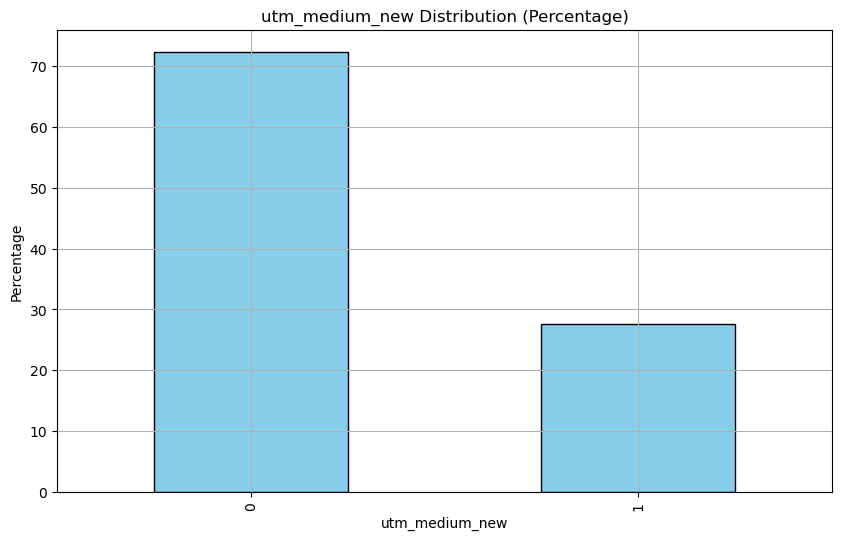

In [74]:
name = 'utm_medium_new'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.15:** Optimizing social media campaigns ver.-1.


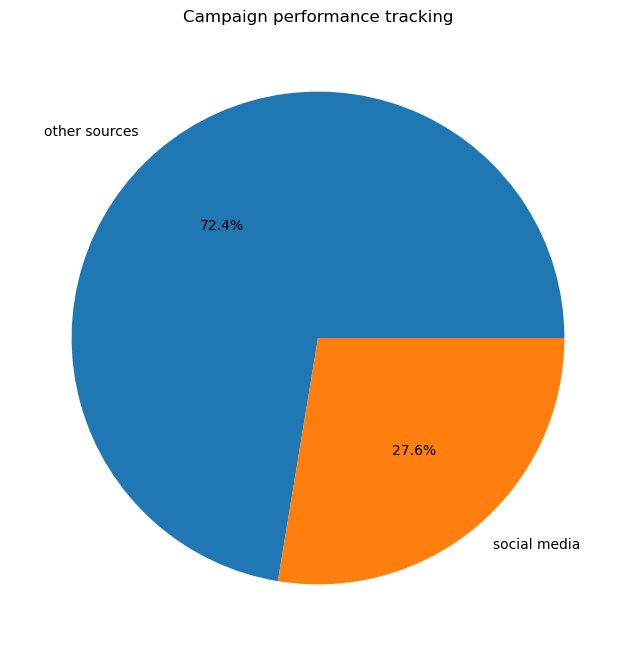

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))
lebels = ['other sources ', 'social media']
ax.pie(data, labels=lebels, autopct='%1.1f%%')
plt.title('Campaign performance tracking')
plt.show()

----

**Fig.16:** Organic paid distribution ver.-2.

#### Conclusion:

>- Around 27.60% of the traffic is associated with advertising on social networks, suggesting a notable share of users reached the website through social media campaigns.
>- The majority, approximately 72.40%, comes from other sources not specifically categorized as social media advertising.

The analysis reveals the significant impact of social media advertising efforts in driving traffic to the website. This information can be valuable for marketing strategies, emphasizing the effectiveness of social media campaigns in attracting visitors.

These new columns serve to categorize the source of visits, allowing for easy distinction between advertising on social networks and other sources, as well as identifying whether the traffic is organic or paid. These binary features can be valuable for training machine learning models to predict or analyze user behavior based on different advertising and traffic sources.

Implementation of these columns involves checking the specified criteria and assigning the appropriate binary values. This process enhances the dataset for subsequent machine-learning tasks related to user behavior analysis or prediction.

---

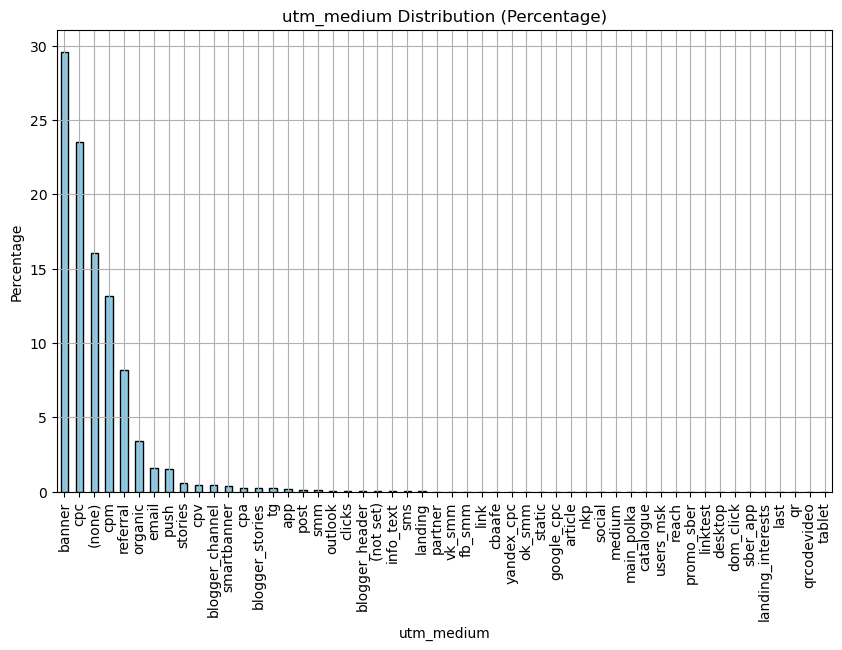

In [76]:
name = 'utm_medium'
data = df_session[name].value_counts(normalize=True) * 100

# Plotting
plot_bar(data, name)

**Fig.17:** Tracking the effectiveness of the medium.

The breakdown of the utm_medium values reveals the distribution of traffic from various marketing channels. Each value represents the proportion of visits attributed to a specific medium. Here are some key observations:

>- The top channels contributing to traffic are "banner" (29.59%), "cpc" (23.51%), and "(none)" (16.06%).
>- There is a diverse range of channels contributing to traffic, including referral, organic, email, push, and others.
>- Certain channels have significant proportions, indicating their importance in the overall marketing strategy.

The analysis reveals the significant impact of social media advertising efforts in driving traffic to the website. This information can be valuable for marketing strategies, emphasizing the effectiveness of social media campaigns in attracting visitors.

#### Next Steps:

Further analysis can involve diving deeper into specific channels to understand their performance metrics, conversion rates, and user engagement. Additionally, comparing these proportions over time can provide insights into the effectiveness of ongoing marketing campaigns.


---

# After analysis, remove columns that do not provide information at this stage.

After conducting the analysis, it is recommended to remove columns that do not contribute significant information at this stage. The identified columns to be dropped include 'utm_source,' 'utm_adcontent,' 'utm_keyword,' and 'device_screen_resolution'.

This step aims to enhance the efficiency and clarity of the dataset by removing columns that are deemed less relevant for the current analytical focus. Columns such as 'utm_source,' 'utm_adcontent,' and 'utm_keyword' may have served their purpose in the initial analysis but are not considered crucial for the subsequent stages of data processing or machine learning. Similarly, 'device_screen_resolution' might not be a key factor for the specific analysis being conducted.

In [77]:
# drop all utm and device_screen_resolution
drop_coloms = ['utm_source', 'utm_adcontent', 'utm_keyword', 'device_screen_resolution']
df_session = df_session.drop(columns=drop_coloms)

---

# Summary of Data Cleaning and Column Addition:

In [78]:
after_size = df_session.shape
print(f'{((1-after_size[0]/before_size[0])*100):.2f}% of data was deleted during cleaning')

1.71% of data was deleted during cleaning


**Initial Dataset:**
>- The original dataset contained information about user sessions, including details such as session ID, client ID, visit date and time, UTM parameters, device information, and geographic details.

**Data Preparation:**
>- Preliminary steps involved reading and understanding the dataset, assessing the completeness and cleanliness of the data, and preparing it for further analysis.

**Data Cleaning:**
>- The cleaning process addressed issues such as duplicates, missing values, and inconsistent data types. Notably, 1.71% of the data was deemed unnecessary or problematic and was removed during this phase to ensure the integrity and reliability of the dataset.

**New Columns for Analysis:**
>- To enhance the dataset for machine learning and analysis, new columns were created. These included binary columns to categorize data based on certain conditions, such as whether a session was from organic or paid traffic or if it was related to advertising on social networks.

**Column Removal:**
>- Based on the analysis, certain columns were identified as less relevant for the current focus and were subsequently dropped from the dataset. This process aimed to streamline the dataset for better clarity and efficiency.

#### Conclusion:

The data is now in a refined state, with necessary cleaning steps completed, new informative columns added, and less relevant columns removed. This sets the stage for further in-depth analyses, modeling, and deriving valuable insights from the prepared dataset.

---

# Save the new data frame

In [79]:
path_ga_session = path_ga_session[:-4] + '_clear' + path_ga_session[-4:]
path_ga_session

'data/ga_sessions_clear.csv'

In [80]:
df_session.to_csv(path_ga_session, index=False)

#  END